In [1]:
import pandas as pd

In [2]:
import rpy2

In [3]:
from rpy2.robjects import pandas2ri
import rpy2.rinterface_lib.callbacks
import rpy2.rinterface_lib.embedded
import rpy2.robjects as ro

In [4]:
from glob import glob

In [5]:
pandas2ri.activate()

In [6]:
%load_ext rpy2.ipython

In [7]:
def plot_summary(df, name):
    df_metrics = df.drop(df.columns[0:11], axis=1)
    df_scaled = (df_metrics-df_metrics.min())/(df_metrics.max()-df_metrics.min())
    df_scaled.insert(0, 'Score overall', df_scaled.mean(axis=1))
    df_scaled.insert(0, 'Method', df_scaled.index)
    df_scaled = df_scaled.sort_values(by='Score overall', ascending=False)
    column_info = pd.DataFrame(index=df_scaled.columns, data=\
                           {"id" : df_scaled.columns,\
                            "group" : ['Text', 'Score overall'] + ['Metric'] * (len(df_scaled.columns)-2),\
                            "geom" : ['text', 'bar'] + ['circle'] * (len(df_scaled.columns)-2),\
                            "width" : [30, 2] + [2] * (len(df_scaled.columns)-2),\
                            "overlay" : False})
    #print(df_scaled)
    #print(column_info)
    row_info = pd.DataFrame(index=df_scaled.index, data={'id':df_scaled.Method})
    #print(row_info)
    ro.globalenv["df_scaled"] = df_scaled
    ro.globalenv["column_info"] = column_info
    ro.globalenv["row_info"] = row_info
    ro.globalenv["task"] = name
    ro.r('palettes <- list("Score overall" = "YlGnBu", "Metric" = "BuPu")')
    ro.r('source("knit_table.R")')
    ro.r('g <- scIB_knit_table(data=df_scaled, column_info=column_info, row_info=row_info, palettes=palettes, usability=F)')
    ro.r('outdir <- "/Users/daniel.strobl/scib-reproducibility/"')
    ro.r('ggsave(paste0(outdir, "/", format(Sys.time(), "%Y%m%d_%H%M%S_"), task, "_summary_metrics.pdf"), g, device = cairo_pdf, width = 297, height = 420, units = "mm")')

In [35]:
def plot_summary_clean(df, name):
    df_metrics = df#.drop(df.columns[0:11], axis=1)
    df_scaled = (df_metrics-df_metrics.min())/(df_metrics.max()-df_metrics.min())
    df_scaled.insert(0, 'Score overall', df_scaled.mean(axis=1))
    df_scaled.insert(0, 'Method', df_scaled.index)
    df_scaled = df_scaled.sort_values(by='Score overall', ascending=False)
    column_info = pd.DataFrame(index=df_scaled.columns, data=\
                           {"id" : df_scaled.columns,\
                            "group" : ['Text', 'Score overall'] + ['Metric'] * (len(df_scaled.columns)-2),\
                            "geom" : ['text', 'bar'] + ['circle'] * (len(df_scaled.columns)-2),\
                            "width" : [df_scaled.index.str.len().max()/4, 2] + [2] * (len(df_scaled.columns)-2),\
                            "overlay" : False})
    #print(df_scaled)
    #print(column_info)
    row_info = pd.DataFrame(index=df_scaled.index, data={'id':df_scaled.Method})
    #print(row_info)
    ro.globalenv["df_scaled"] = df_scaled
    ro.globalenv["column_info"] = column_info
    ro.globalenv["row_info"] = row_info
    ro.globalenv["task"] = name
    ro.r('palettes <- list("Score overall" = "YlGnBu", "Metric" = "BuPu")')
    ro.r('source("knit_table.R")')
    ro.r('g <- scIB_knit_table(data=df_scaled, column_info=column_info, row_info=row_info, palettes=palettes, usability=F)')
    ro.r('outdir <- "/Users/daniel.strobl/scib-reproducibility/"')
    ro.r('ggsave(paste0(outdir, "/", format(Sys.time(), "%Y%m%d_%H%M%S_"), task, "_summary_metrics.pdf"), g, device = cairo_pdf, width = 297, height = 420, units = "mm")')

In [32]:
spatial_all.index.str.len().max()

67

In [21]:
csvs = {}
for i in glob('/Users/daniel.strobl/website/data/results/spatial_decomposition/*.csv'):
    name = "_".join(i.split('/')[-1:]).split('.')[0]
    csvs[name] = pd.read_csv(i, index_col=1).r2

In [24]:
spatial_all = pd.concat(csvs, axis=1)

In [36]:
plot_summary_clean(spatial_all, "Spatial deconvolution")

/Users/daniel.strobl/mambaforge/envs/sct/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [19]:
csvs['pancreas_alpha_0_5'].r2

Name
Non-Negative Matrix Factorization (NMF)                                 -0.231818
Random assignment (baseline)                                            -0.471653
Non-Negative Least Squares                                              -1.317422
NMF-reg                                                                 -0.907121
Stereoscope                                                              0.105357
RCTD                                                                    -0.962553
SeuratV3                                                                -1.669969
Cell2location (detection_alpha=20, reference NB without batch info)   -107.290130
Cell2location (detection_alpha=20, reference hard-coded)               -72.105982
DestVI                                                                  -1.163724
Cell2location (detection_alpha=200, reference hard-coded)              -44.824812
Cell2location, amortised (detection_alpha=20, reference hard-coded)     -1.959369
Name: r2, d

In [28]:
for i in glob('/Users/daniel.strobl/website/data/results/*/*.csv'):
    name = "_".join(i.split('/')[-2:]).split('.')[0]
    df = pd.read_csv(i, index_col=1)
    print(df)
    #plot_summary(df, name)

                                      Unnamed: 0  \
Name                                               
Majority Vote                                  0   
Multilayer perceptron (log CPM)                1   
Random Labels                                  2   
Logistic regression (log CPM)                  3   
K-neighbors classifier (log CPM)               4   
XGBoost (log CPM)                              5   
XGBoost (log scran)                            6   
Logistic regression (log scran)                7   
K-neighbors classifier (log scran)             8   
Multilayer perceptron (log scran)              9   
scANVI (Seurat v3 2000 HVG)                   10   
scArches+scANVI (Seurat v3 2000 HVG)          11   
scArches+scANVI (All genes)                   12   
scANVI (All genes)                            13   

                                                                                  Paper  \
Name                                                                        

In [6]:
df = pd.read_csv('/Users/daniel.strobl/website/data/results/batch_integration_graph/immune_batch.csv', index_col=1)

In [7]:
df_metrics = df.drop(df.columns[0:11], axis=1)

In [8]:
df_scaled = (df_metrics-df_metrics.min())/(df_metrics.max()-df_metrics.min())

In [9]:
df_scaled.insert(0, 'Score overall', df_scaled.mean(axis=1))

In [10]:
df_scaled.insert(0, 'Method', df_scaled.index)

In [80]:
df_scaled = df_scaled.sort_values(by='Score overall', ascending=False)

In [113]:
column_info = pd.DataFrame(index=df_scaled.columns, data=\
                           {"id" : df_scaled.columns,\
                            "group" : ['Text', 'Score overall'] + ['Metric'] * (len(df_scaled.columns)-2),\
                            "geom" : ['text', 'bar'] + ['circle'] * (len(df_scaled.columns)-2),\
                            "width" : [30, 2] + [2] * (len(df_scaled.columns)-2),\
                            "overlay" : False})

In [102]:
row_info = pd.DataFrame(index=df_scaled.index, data={'id':df_scaled.Method})

/Users/daniel.strobl/mambaforge/envs/sct/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/Users/daniel.strobl/mambaforge/envs/sct/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/Users/daniel.strobl/mambaforge/envs/sct/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


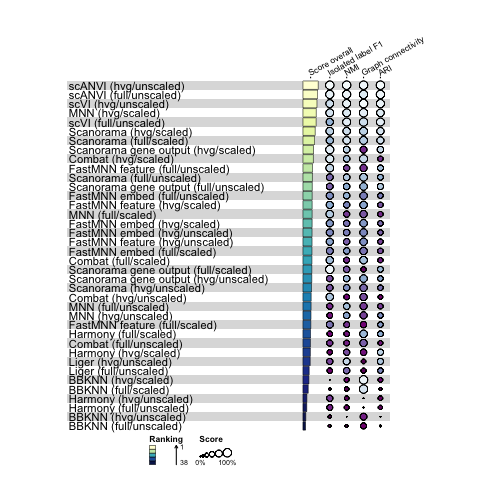

In [114]:
%%R -i df_scaled,column_info,row_info
palettes <- list("Score overall" = "YlGnBu", "Metric" = "BuPu")
source('knit_table.R')
scIB_knit_table(data=df_scaled, column_info=column_info, row_info=row_info, palettes=palettes, usability=F)

In [79]:
row_info

,id
Name,
Harmony (full/unscaled),Harmony (full/unscaled)
Harmony (hvg/unscaled),Harmony (hvg/unscaled)
Combat (hvg/unscaled),Combat (hvg/unscaled)
Harmony (hvg/scaled),Harmony (hvg/scaled)
BBKNN (hvg/unscaled),BBKNN (hvg/unscaled)
BBKNN (hvg/scaled),BBKNN (hvg/scaled)
Combat (hvg/scaled),Combat (hvg/scaled)
Harmony (full/scaled),Harmony (full/scaled)
BBKNN (full/scaled),BBKNN (full/scaled)


In [71]:
column_info

,group,geom,width,overlay
Method,Text,text,8,False
Score overall,Score overall,bar,2,False
Isolated label F1,Metric,circle,1,False
NMI,Metric,circle,1,False
Graph connectivity,Metric,circle,1,False
ARI,Metric,circle,1,False


In [62]:
['Text', 'Score overall'] + ['Metric']*(len(df_scaled)-2)

['Text',
 'Score overall',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric',
 'Metric']

In [56]:
column_info

""
Method
Score overall
Isolated label F1
NMI
Graph connectivity
ARI


In [33]:
df_scaled

,Score overall,Isolated label F1,NMI,Graph connectivity,ARI
Name,,,,,
Harmony (full/unscaled),0.248287,0.459859,0.296936,0.002891,0.233461
Harmony (hvg/unscaled),0.256568,0.520185,0.246756,0.000000,0.259331
Combat (hvg/unscaled),0.537054,0.764383,0.395614,0.721560,0.266658
Harmony (hvg/scaled),0.484715,0.347602,0.523858,0.549306,0.518095
BBKNN (hvg/unscaled),0.186530,0.110380,0.000000,0.635741,0.000000
BBKNN (hvg/scaled),0.388975,0.000000,0.300624,0.983631,0.271643
Combat (hvg/scaled),0.682760,0.888168,0.580340,0.898154,0.364377
Harmony (full/scaled),0.503690,0.391620,0.396531,0.799636,0.426973
BBKNN (full/scaled),0.345013,0.067255,0.244566,0.973233,0.094996
